In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Carrega a imagem
imagem_bgr = cv2.imread('img_folha_4.jpg')
imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)
imagem_hsv = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2HSV)

In [3]:
# Faixas de cor para áreas saudáveis (verde) e danificadas (amareladas/marrons)
# Verde saudável
inferior_verde = np.array([35, 40, 40])
superior_verde = np.array([85, 255, 255])
# Danificado - tons de marrom/amarelo
inferior_marron = np.array([10, 50, 50])
superior_marron = np.array([30, 255, 255])

In [4]:
# Máscaras
mascara_saudavel = cv2.inRange(imagem_hsv, inferior_verde, superior_verde)
mascara_danificada = cv2.inRange(imagem_hsv, inferior_marron, superior_marron)

In [5]:
# Operações morfológicas
elemento_estrutura = np.ones((5, 5), np.uint8)
mascara_saudavel_limpa = cv2.morphologyEx(mascara_saudavel, cv2.MORPH_OPEN, elemento_estrutura)
mascara_danificada_limpa = cv2.morphologyEx(mascara_danificada, cv2.MORPH_OPEN, elemento_estrutura)


In [6]:
# 5. Cria imagens com as áreas segmentadas
area_saudavel = np.zeros_like(imagem_rgb)
area_saudavel[mascara_saudavel_limpa > 0] = [0, 255, 0]  # Verde

area_danificada = np.zeros_like(imagem_rgb)
area_danificada[mascara_danificada_limpa > 0] = [255, 0, 0]  # Vermelho

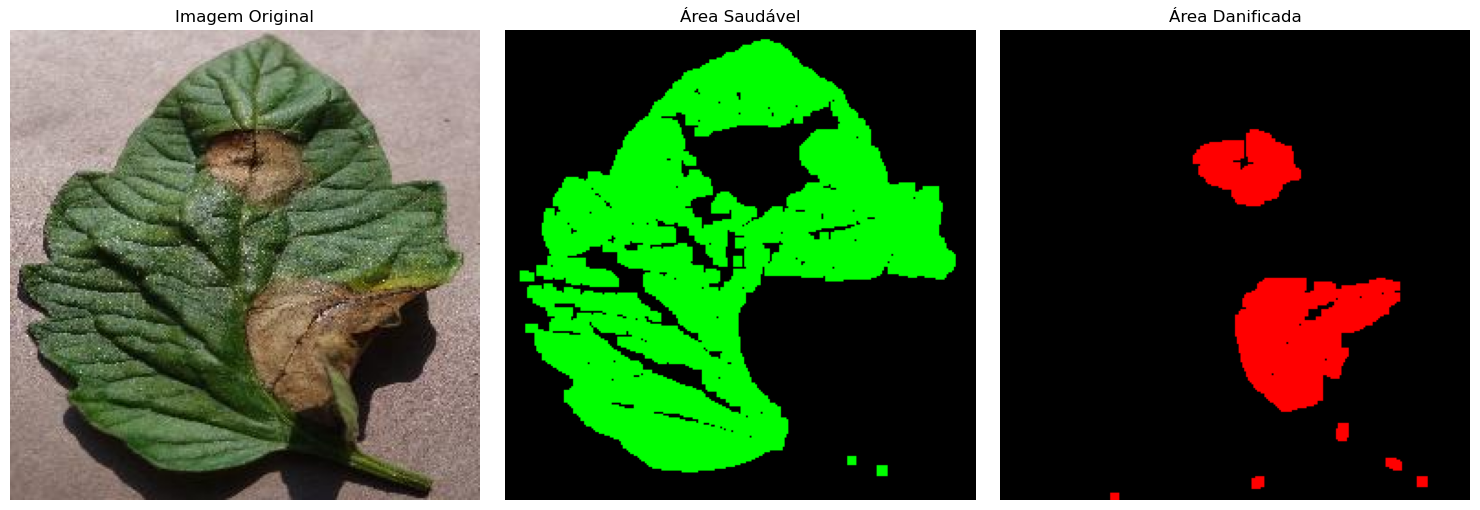

In [7]:
# 6. Exibe os resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(imagem_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Área Saudável')
plt.imshow(area_saudavel)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Área Danificada')
plt.imshow(area_danificada)
plt.axis('off')

plt.tight_layout()
plt.show()